### 의사결정트리는 회귀, 분류에 모두 사용 가능

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import seaborn as sns

In [3]:
cancer = load_breast_cancer()
all_X=cancer.data
all_Y=cancer.target

In [4]:
def testTreeModel(TestSize=0.3):
    cancer=load_breast_cancer()
    all_X=cancer.data
    all_Y=cancer.target

    X_train, X_test, y_train, y_test=train_test_split(all_X, all_Y, stratify=all_Y, test_size=TestSize, random_state=77)

    tree=DecisionTreeClassifier(random_state=0)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

In [5]:
testTreeModel(0.3)
testTreeModel(0.2)
testTreeModel(0.1)
testTreeModel(0.5)
testTreeModel(0.4)

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.918
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.912
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.933
훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.921


### 실습 1
* max_depth를 이용하여 과적합을 해소시켜보자.
* max_leaf_nodes, min_sample_leaf를 추가해서 최적의 모델을 만들어보자.

In [6]:
def testTreeModel_N(TestSize=0.3,treeDepth=4):
    cancer=load_breast_cancer()
    all_X=cancer.data
    all_Y=cancer.target

    X_train, X_test, y_train, y_test=train_test_split(all_X, all_Y, stratify=all_Y, test_size=TestSize, random_state=77)

    tree=DecisionTreeClassifier(random_state=0,max_depth=treeDepth)
    tree.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))
    a = tree.score(X_train, y_train)
    b = tree.score(X_test, y_test)
    return a, b

In [8]:
testSize = [0.1, 0.2, 0.3, 0.4, 0.5]
treeDepth = [2,3,4,5]

for size in testSize:
    for depth in treeDepth:
        print("testSize, treeDepth : ", size, depth)
        s1, s2 = testTreeModel_N(size, depth) 

testSize, treeDepth :  0.1 2
훈련 세트 정확도 : 0.953
테스트 세트 정확도 : 0.877
testSize, treeDepth :  0.1 3
훈련 세트 정확도 : 0.971
테스트 세트 정확도 : 0.877
testSize, treeDepth :  0.1 4
훈련 세트 정확도 : 0.986
테스트 세트 정확도 : 0.877
testSize, treeDepth :  0.1 5
훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.877
testSize, treeDepth :  0.2 2
훈련 세트 정확도 : 0.956
테스트 세트 정확도 : 0.886
testSize, treeDepth :  0.2 3
훈련 세트 정확도 : 0.980
테스트 세트 정확도 : 0.895
testSize, treeDepth :  0.2 4
훈련 세트 정확도 : 0.987
테스트 세트 정확도 : 0.886
testSize, treeDepth :  0.2 5
훈련 세트 정확도 : 0.991
테스트 세트 정확도 : 0.912
testSize, treeDepth :  0.3 2
훈련 세트 정확도 : 0.972
테스트 세트 정확도 : 0.912
testSize, treeDepth :  0.3 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.906
testSize, treeDepth :  0.3 4
훈련 세트 정확도 : 0.985
테스트 세트 정확도 : 0.906
testSize, treeDepth :  0.3 5
훈련 세트 정확도 : 0.992
테스트 세트 정확도 : 0.889
testSize, treeDepth :  0.4 2
훈련 세트 정확도 : 0.971
테스트 세트 정확도 : 0.917
testSize, treeDepth :  0.4 3
훈련 세트 정확도 : 0.982
테스트 세트 정확도 : 0.925
testSize, treeDepth :  0.4 4
훈련 세트 정확도 : 0.994
테스트 세트 정확도 : 0.939
testSize, 

In [9]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_Y, 
                                                    stratify=cancer.target, 
                                                    test_size = 0.4,
                                                    random_state=77)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
def plot_feature_imp(model, n_features):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def plot_feature_imp(model, n_features):
    n_features = cancer.data.shape[1]
    imp = model.feature_importances_
    plt.barh(range(n_features) , imp, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

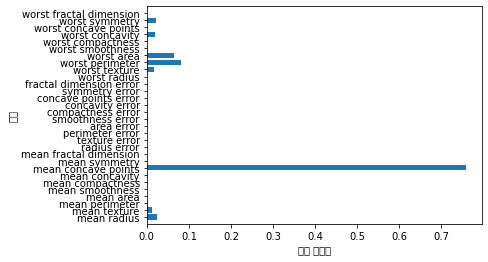

In [12]:
fea_num = cancer.data.shape[1]
# 모델, 피처의 개수
plot_feature_imp(tree, fea_num)